<a href="https://colab.research.google.com/github/NicoWright/Data-Analysis-Projects/blob/main/ZerotoPandas-Course-Project-zerotopandas_course_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
!pip install opendatasets --upgrade -q
import jovian
jovian.set_project('zerotopandas-course-project-starter')
jovian.set_colab_id('1SxqVgoMCTkbEgdYKt-Yrawejh_8BBCxy')

# Automobile Insurance Data Exploration
**Nico Wright**

Final Project for Course: 
[Data Analysis with Python: Zero to Pandas](zerotopandas.com).

**TODO** - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. 

Will be using python, pandas, numpy, matplotlib and seaborn to analyze and visualize data taken from linked source.
https://www.kaggle.com/aashishjhamtani/automobile-insurance

## Downloading the Dataset

**TODO** - add some explanation here

Dowloading and verifying data using Jovian's opendatasets library

In [5]:
dataset_url = 'https://www.kaggle.com/aashishjhamtani/automobile-insurance'
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nicowright
Your Kaggle Key: ··········


100%|██████████| 135k/135k [00:00<00:00, 33.3MB/s]

In [6]:
data_dir = './automobile-insurance'
import os
os.listdir(data_dir)

['insurance_claims.csv', 'insurance_data_set.csv']

In [ ]:
project_name = "zerotopandas-course-project" 
jovian.commit(project=project_name)

## Data Preparation and Cleaning

We will import the necessary modules for analysis and understand the shape and content of our data


In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('/content/automobile-insurance/insurance_claims.csv')

In [10]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,Masters,craft-repair,paintball,unmarried,0,0,2015-02-22,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1,YES,0,1,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,PhD,prof-specialty,sleeping,wife,70900,0,2015-01-24,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1,YES,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,35100,0,2015-01-23,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3,?,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,Associate,handlers-cleaners,base-jumping,wife,0,0,2015-02-26,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1,?,0,1,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [12]:
df.incident_date.apply(lambda x: x.split('-')[0]).unique()

array(['2015'], dtype=object)

In [13]:
df.incident_date.apply(lambda x: x.split('-')[1]).unique()

array(['01', '02', '03'], dtype=object)

It seems this dataset has 1000 rows and 40 columns. There are no non vull values and the data types are already assigned to make analysis easier. While data cleansing is an integral part of the data analysis process, this data set will provide enough content to dig into and make interesting conclusions.

The dataset also collects data from January 1st 2015 until March 1st 2015. Three months of data in a single year is not a large enough sample size to draw any meaningful conclusions from. The rest of the analysis then is to theorize based on connections we notice.

Note: CSL is a single number that describes the predetermined limit for the combined total of the Bodily Injury Liability coverage and Property Damage Liability coverage per occurrence or accident.

Set policy state and incident state to full name of state instead of abbreviation

In [14]:
states_dict = {
    "AK" : "Alaska",
    "AL" : "Alabama",
    "AR" : "Arkansas",
    "AS" : "American Samoa",
    "AZ" : "Arizona",
    "CA" : "California",
    "CO" : "Colorado",
    "CT" : "Connecticut",
    "DC" : "District of Columbia",
    "DE" : "Delaware",
    "FL" : "Florida",
    "GA" : "Georgia",
    "GU" : "Guam",
    "HI" : "Hawaii",
    "IA" : "Iowa",
    "ID" : "Idaho",
    "IL" : "Illinois",
    "IN" : "Indiana",
    "KS" : "Kansas",
    "KY" : "Kentucky",
    "LA" : "Louisiana",
    "MA" : "Massachusetts",
    "MD" : "Maryland",
    "ME" : "Maine",
    "MI" : "Michigan",
    "MN" : "Minnesota",
    "MO" : "Missouri",
    "MS" : "Mississippi",
    "MT" : "Montana",
    "NC" : "North Carolina",
    "ND" : " North Dakota",
    "NE" : "Nebraska",
    "NH" : "New Hampshire",
    "NJ" : "New Jersey",
    "NM" : "New Mexico",
    "NV" : "Nevada",
    "NY" : "New York",
    "OH" : "Ohio",
    "OK" : "Oklahoma",
    "OR" : "Oregon",
    "PA" : "Pennsylvania",
    "PR" : "Puerto Rico",
    "RI" : "Rhode Island",
    "SC" : "South Carolina",
    "SD" : "South Dakota",
    "TN" : "Tennessee",
    "TX" : "Texas",
    "UT" : "Utah",
    "VA" : "Virginia",
    "VI" : "Virgin Islands",
    "VT" : "Vermont",
    "WA" : "Washington",
    "WI" : "Wisconsin",
    "WV" : "West Virginia",
    "WY" : "Wyoming"
}

In [15]:
df.policy_state = df.policy_state.map(states_dict)
df.incident_state = df.incident_state.map(states_dict)

In [16]:
df['years_as_customer'] = df.months_as_customer/12

In [17]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: 


Abort: ignored

## Exploratory Analysis and Visualization

- Compute the mean, sum, range and other interesting statistics for numeric columns
- Explore distributions of numeric columns using histograms etc.
- Explore relationship between columns using scatter plots, bar charts etc.
- Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [18]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Columns to Explore
- years_as_customer
- policy_state
- incident_state
- insured_education_level
- insured_occupation
- incident_type
- collision_type
- incident_severity
- total_claim_amount
- fraud_reported

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### Exploring years_as_customer column

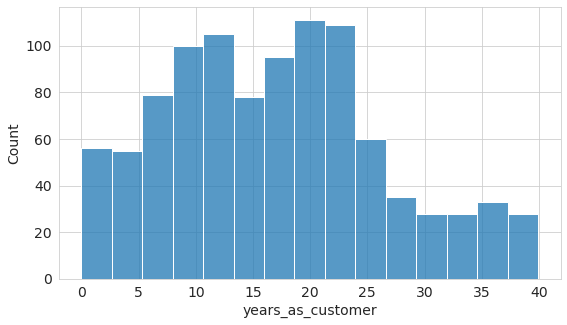

In [22]:
sns.histplot(df.years_as_customer);

Many people stay with their insurance for 10 years or more. People seem to be averse to switching auto insurance.

I theorized that policy premiums for loyal customers would be lower for new customers. To investigate I need to create bins for the ages and compare to the policy premiums

In [68]:
#bins = [0,10,20,30,40]
bins = [0,5,10,15,20,25,30,]
df['years_bin'] = pd.cut(df.years_as_customer, bins)

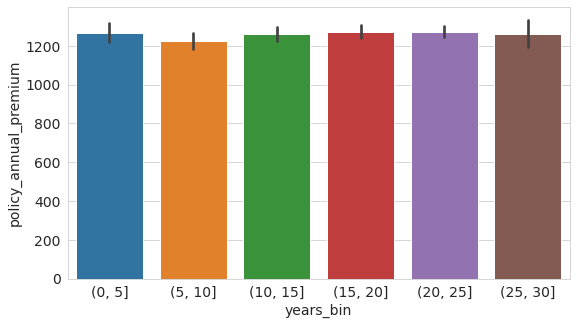

In [69]:
sns.barplot(x='years_bin', y='policy_annual_premium', data=df);

How about years as customer vs total claim amounts?

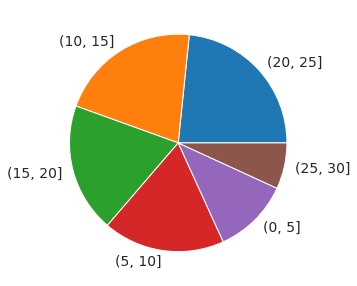

In [75]:
labels = df.years_bin.value_counts().index
plt.pie(df['years_bin'].value_counts(), labels=labels);


The number of claims filed by customers with less than 20 years of history is a higher than the rest. Is it true that younger drivers are involved in more accidents?

New drivers are probably not shopping for new insurance after 5 years. Between 5-15 years are the highest percentage of claims filed. What is the reason?

**Question:** What percentage of drivers have histories less than 20 years?

In [71]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/nicowright/zerotopandas-course-project


'https://jovian.ai/nicowright/zerotopandas-course-project'

## Asking and Answering Questions

Questions
- Ratio of incident types and collison types and which ones have the highest severity and claim amount
- Property damage/bodiy injuries and type of incidents
- Auto Makes/ Years with the highest number of incidents and claim amounts
- Effect of fraud on the claim data
- Is there a connection with number of witnesses and total claim amount?
- What hour of the day is there the most accidents?
- What states and cities have the most accidents
- Relationship between policy state and incident state
- Relationshop between months as customer and policy premium and deductibles
- How does education and occupation affect incident rates?

#### Question 1

Let us save and upload our work to Jovian before continuing.

In [ ]:
jovian.commit()

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [ ]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'